Training Gradient Boosting...
Gradient Boosting - Mean Squared Error: 266.2516786996671
Gradient Boosting - R^2 Score: 0.8651280229290746
--------------------------------------------------
Training Random Forest...
Random Forest - Mean Squared Error: 231.62115947086605
Random Forest - R^2 Score: 0.8826703971901197
--------------------------------------------------
Training KNN...
KNN - Mean Squared Error: 518.3114478114478
KNN - R^2 Score: 0.7374450743513337
--------------------------------------------------
Training XGBoost...
XGBoost - Mean Squared Error: 236.51139759187484
XGBoost - R^2 Score: 0.8801932334899902
--------------------------------------------------

Performance Comparison Table:
               Model  Mean Squared Error (MSE)  R² Score
0  Gradient Boosting                266.251679  0.865128
1      Random Forest                231.621159  0.882670
2                KNN                518.311448  0.737445
3            XGBoost                236.511398  0.880193


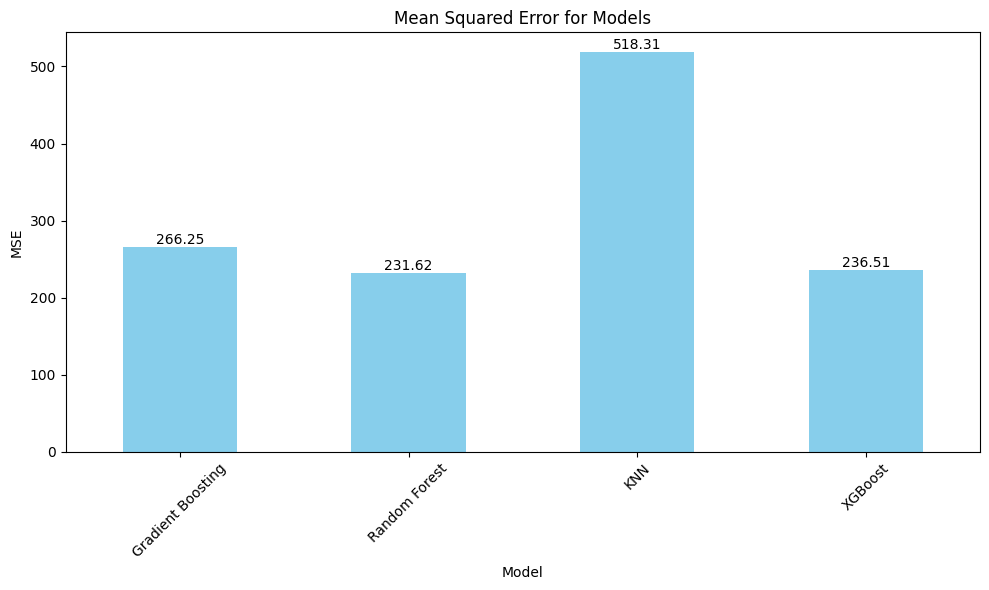

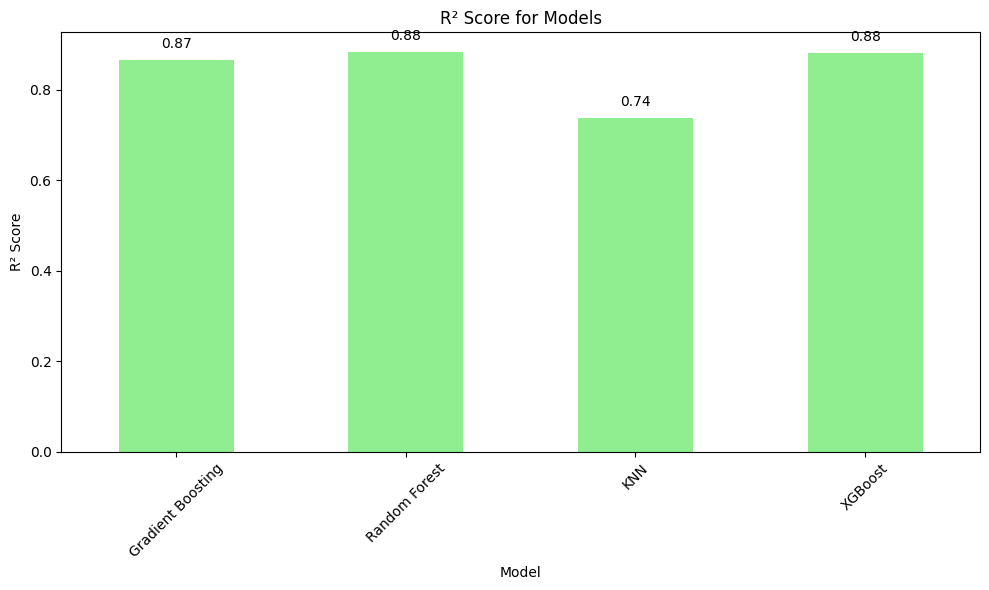

Scatter Plot for Gradient Boosting - Predicted vs Actual


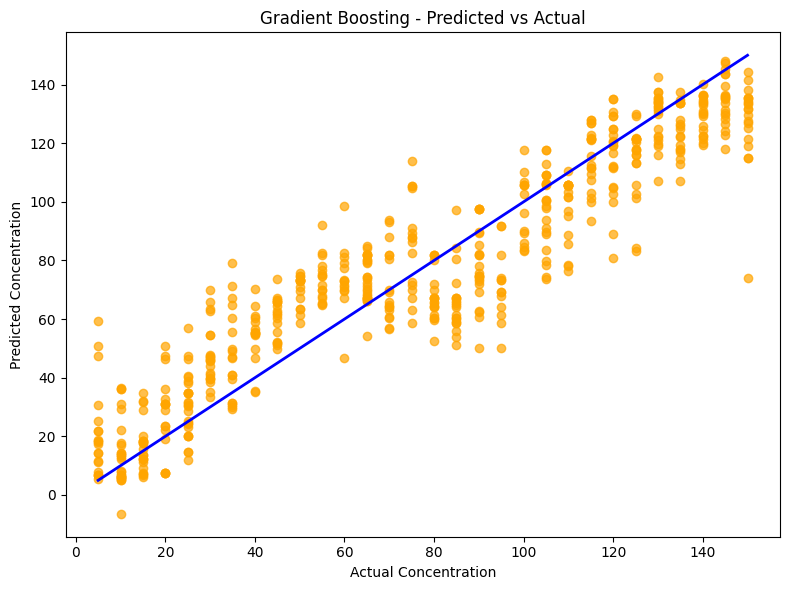

Scatter Plot for Random Forest - Predicted vs Actual


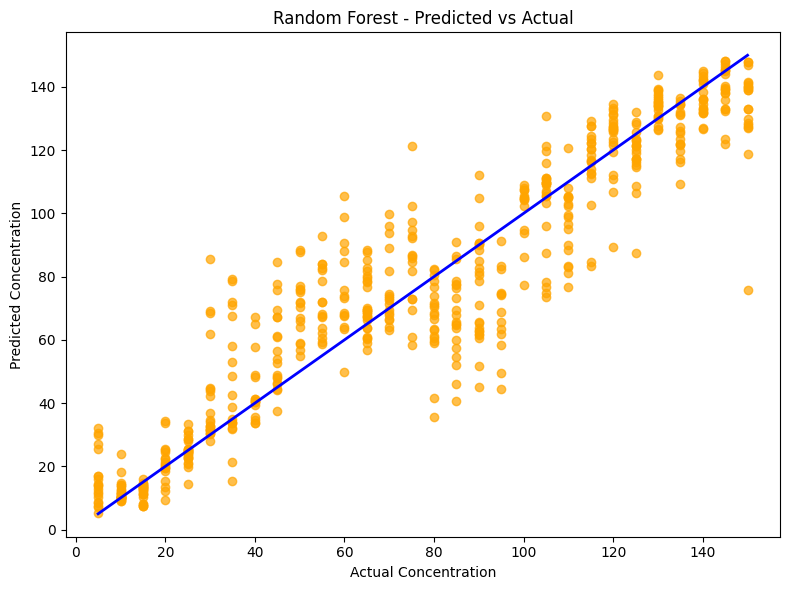

Scatter Plot for KNN - Predicted vs Actual


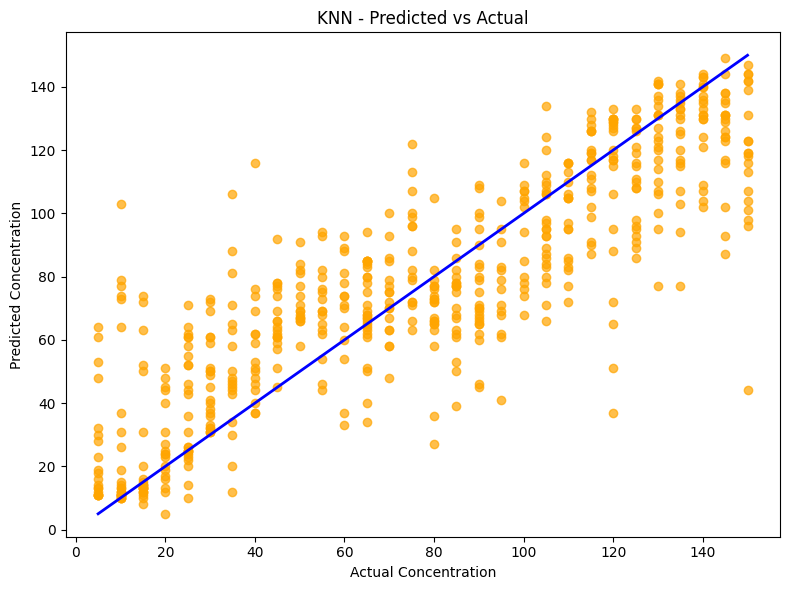

Scatter Plot for XGBoost - Predicted vs Actual


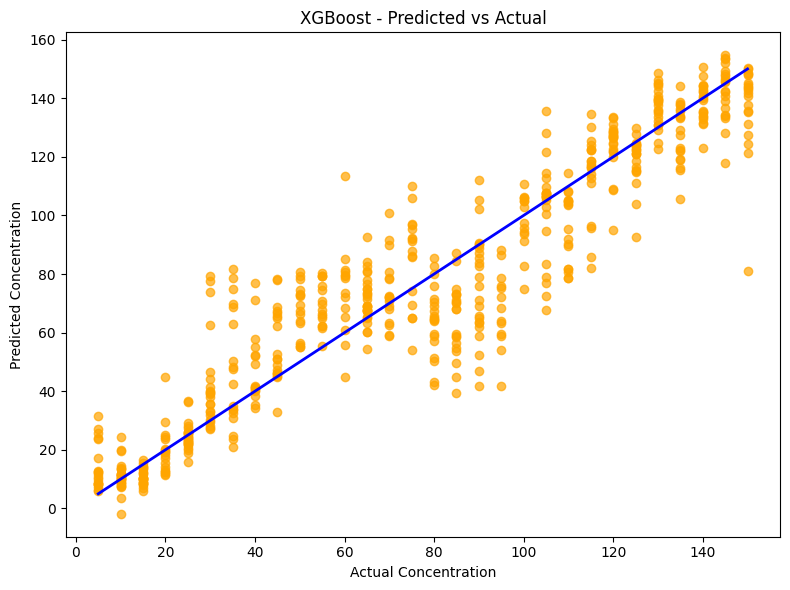

True vs Predicted Table for Gradient Boosting
   Actual   Predicted
0     125  121.265408
1      65   66.746398
2     125  121.265408
3      20   19.176424
4      75  114.057890
5     100  105.798571
6      25   11.826779
7      10   17.073933
8     150  138.305395
9      25   38.309577
True vs Predicted Table for Random Forest
   Actual  Predicted
0     125     119.20
1      65      69.55
2     125     117.30
3      20       9.35
4      75     121.35
5     100     107.35
6      25      19.70
7      10      10.60
8     150     140.60
9      25      33.45
True vs Predicted Table for KNN
   Actual  Predicted
0     125      130.0
1      65       71.0
2     125      121.0
3      20       40.0
4      75      122.0
5     100      107.0
6      25       10.0
7      10       11.0
8     150      142.0
9      25       55.0
True vs Predicted Table for XGBoost
   Actual   Predicted
0     125  123.982811
1      65   74.838722
2     125  114.668510
3      20   15.489321
4      75  109.947235
5     10

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np


data = pd.read_csv('data.csv')


X = data[['Voltage', 'Current']]
y = data['Concentration']  # Label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the models
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(random_state=42),
}


performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Predictions on test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    performance[model_name] = {'MSE': mse, 'R2': r2}

    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R^2 Score: {r2}")
    print("-" * 50)

# Tabular Comparison of Metrics
performance_df = pd.DataFrame(performance).T
performance_df.reset_index(inplace=True)
performance_df.columns = ['Model', 'Mean Squared Error (MSE)', 'R² Score']

print("\nPerformance Comparison Table:")
print(performance_df)


# MSE Bar Graph
plt.figure(figsize=(10, 6))
mse_plot = performance_df.set_index('Model')['Mean Squared Error (MSE)'].plot(kind='bar', color='skyblue')
plt.title('Mean Squared Error for Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.tight_layout()

# Show MSE values on top of bars
for i, v in enumerate(performance_df['Mean Squared Error (MSE)']):
    mse_plot.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

plt.show()

# R² Bar Graph
plt.figure(figsize=(10, 6))
r2_plot = performance_df.set_index('Model')['R² Score'].plot(kind='bar', color='lightgreen')
plt.title('R² Score for Models')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()

# For Showing  R² values on top of bars
for i, v in enumerate(performance_df['R² Score']):
    r2_plot.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

plt.show()

# Scatter Plots for Predicted vs Actual values for each model
for model_name, model in models.items():
    print(f"Scatter Plot for {model_name} - Predicted vs Actual")


    y_pred = model.predict(X_test)

    # Scatter plot for Predicted vs Actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='orange')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', lw=2)  # Identity line
    plt.title(f'{model_name} - Predicted vs Actual')
    plt.xlabel('Actual Concentration')
    plt.ylabel('Predicted Concentration')
    plt.tight_layout()
    plt.show()



# True vs Predicted Table for Each Model
for model_name, model in models.items():
    print(f"True vs Predicted Table for {model_name}")

    y_pred = model.predict(X_test)
    true_vs_predicted = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    }).reset_index(drop=True)

    print(true_vs_predicted.head(10))





Saving processed_data.csv to processed_data (1).csv
Loaded file: processed_data (1).csv


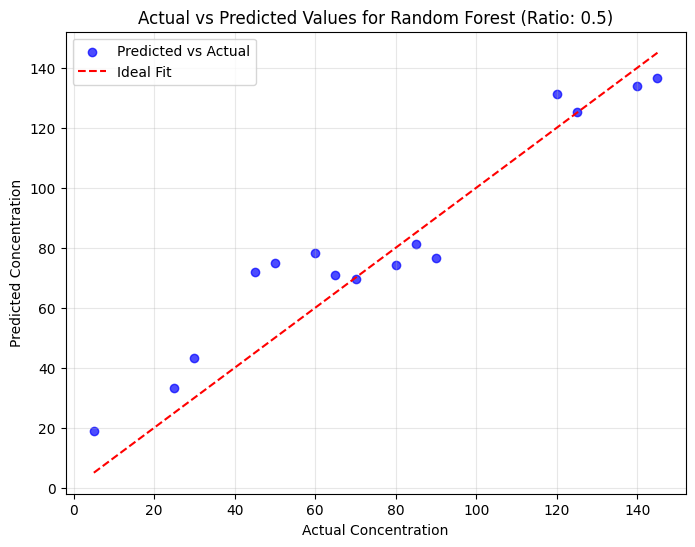

<ipython-input-13-3803bdc8a174>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=feature_names, palette="viridis")


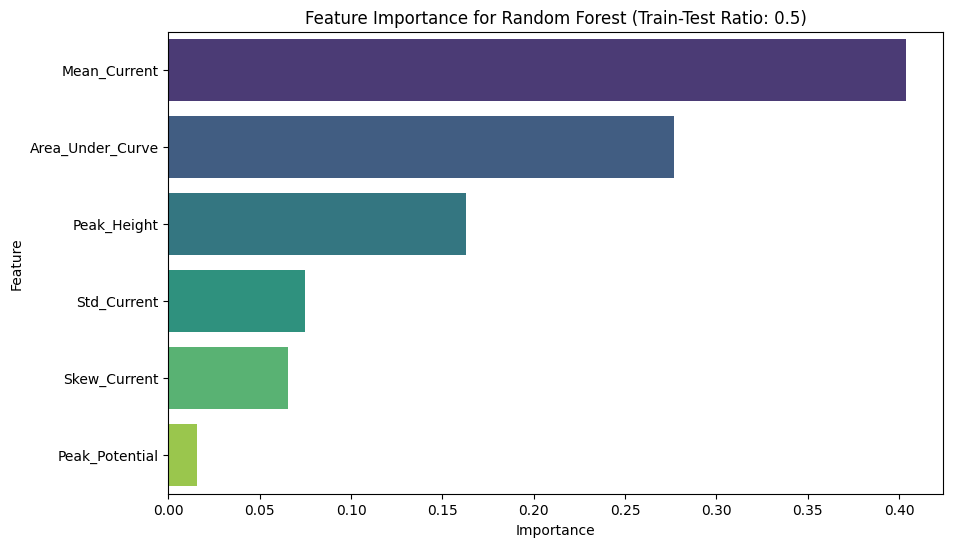

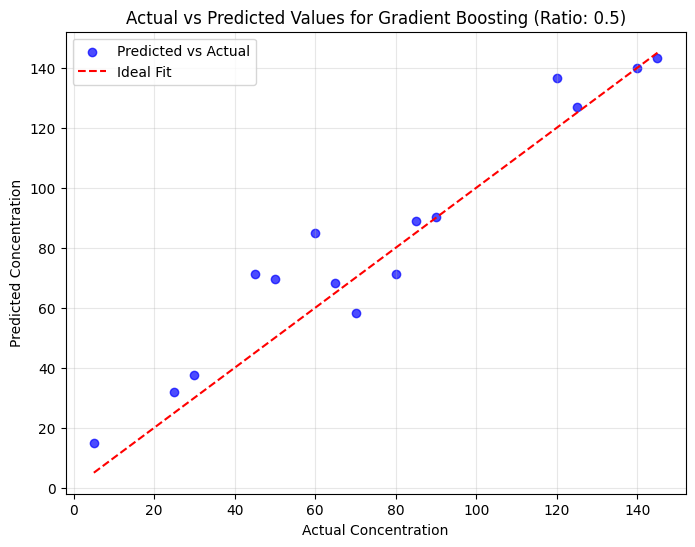

<ipython-input-13-3803bdc8a174>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=feature_names, palette="viridis")


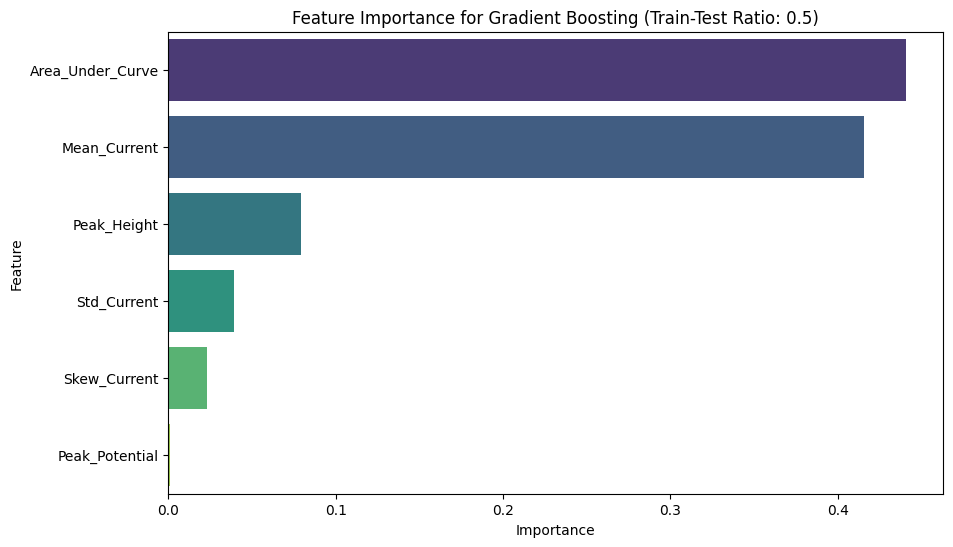

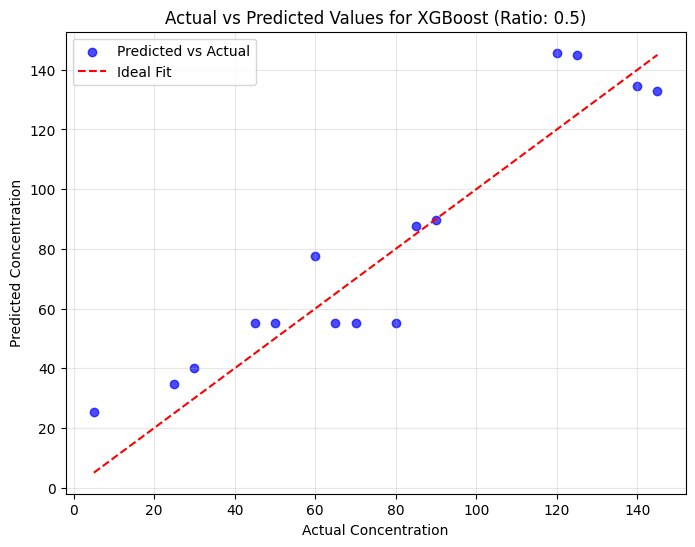

<ipython-input-13-3803bdc8a174>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=feature_names, palette="viridis")


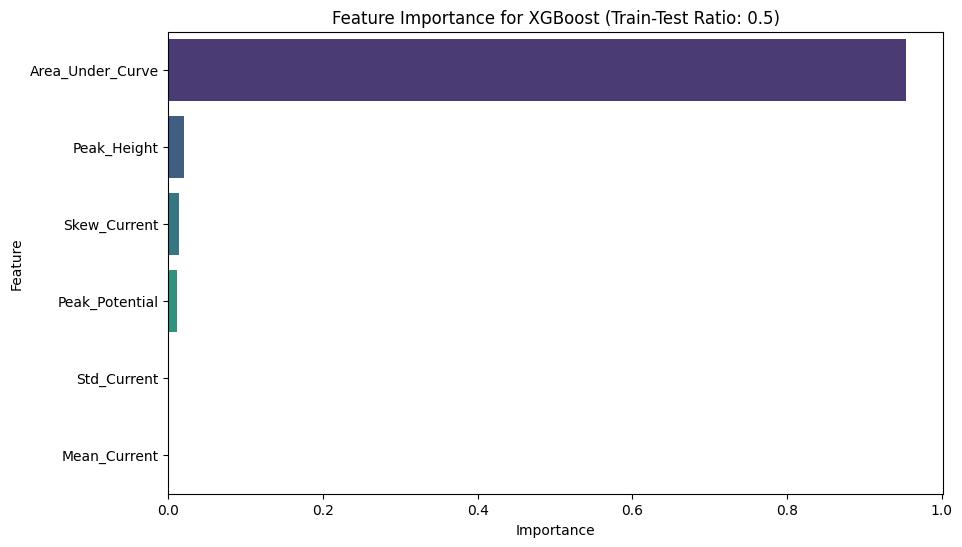

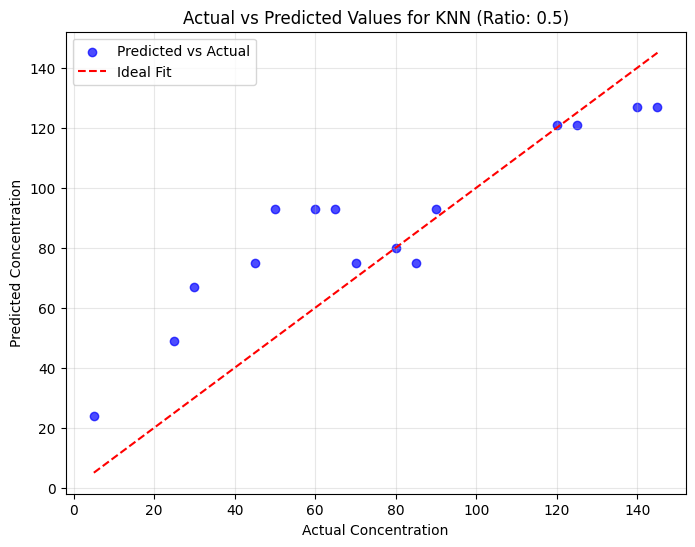

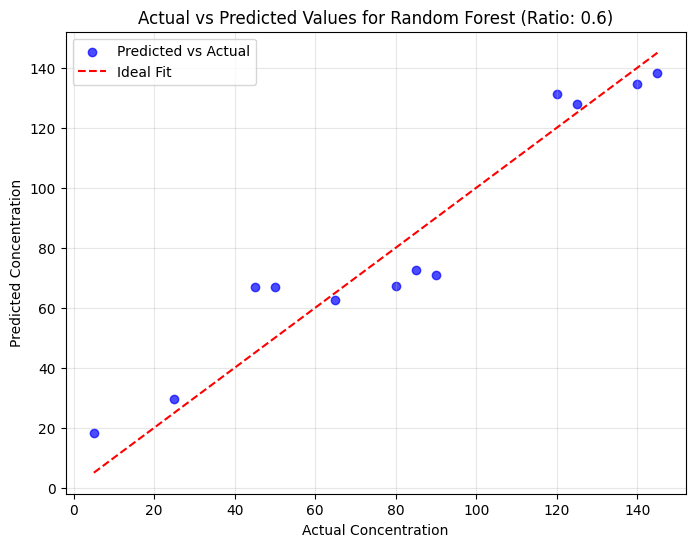

<ipython-input-13-3803bdc8a174>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=feature_names, palette="viridis")


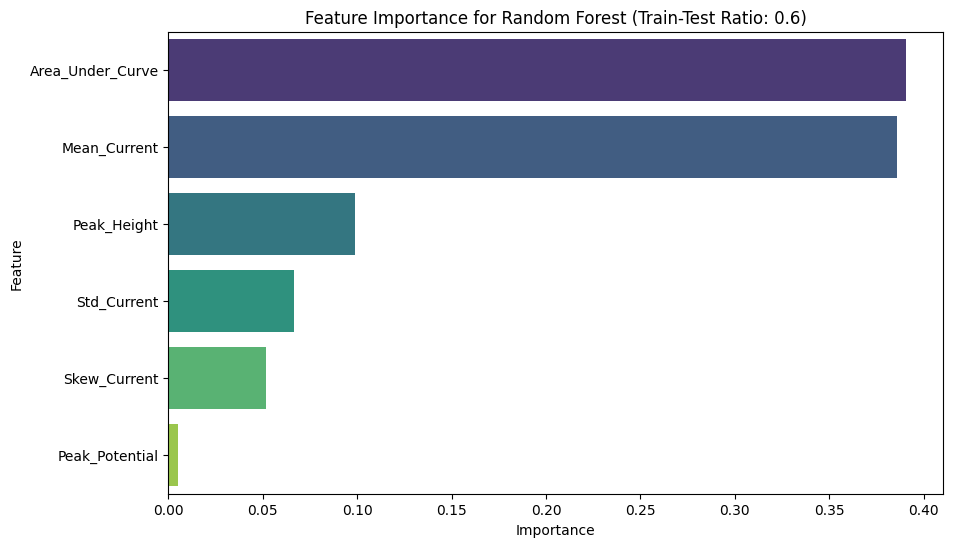

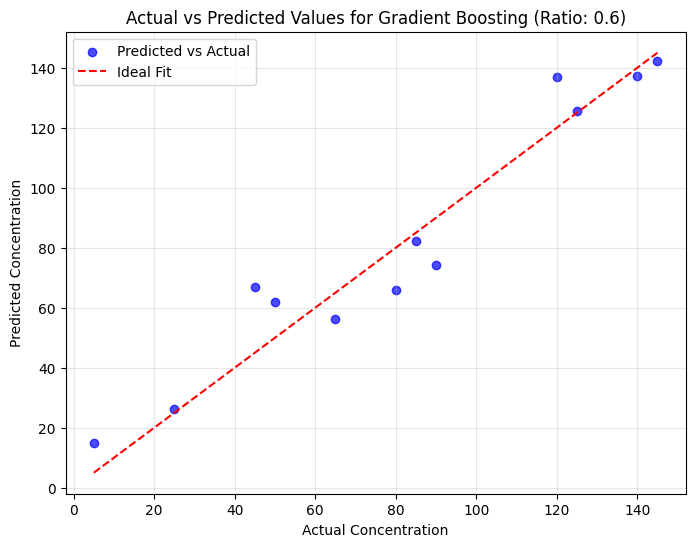

<ipython-input-13-3803bdc8a174>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=feature_names, palette="viridis")


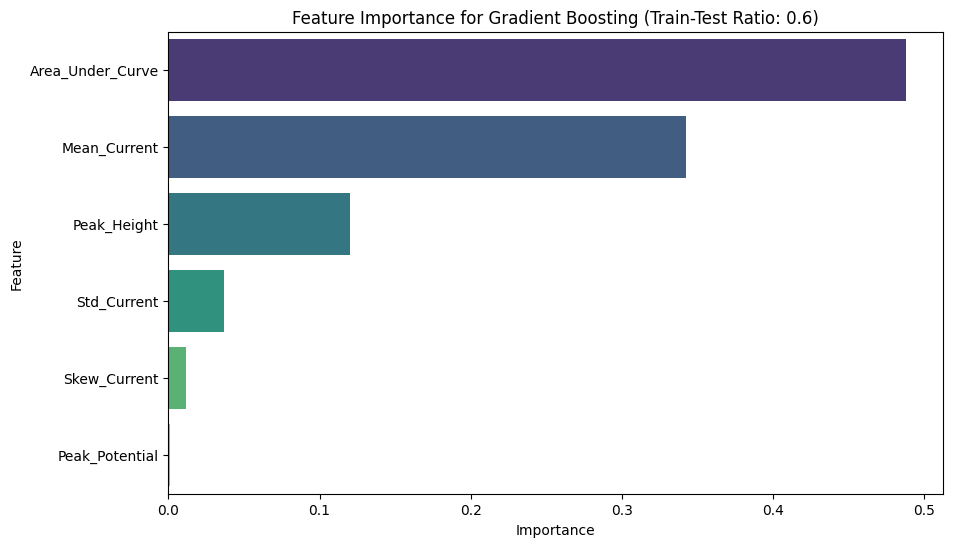

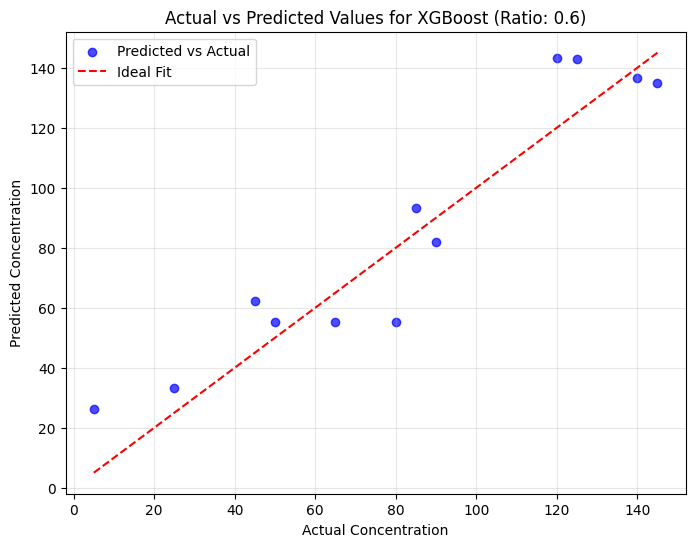

<ipython-input-13-3803bdc8a174>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=feature_names, palette="viridis")


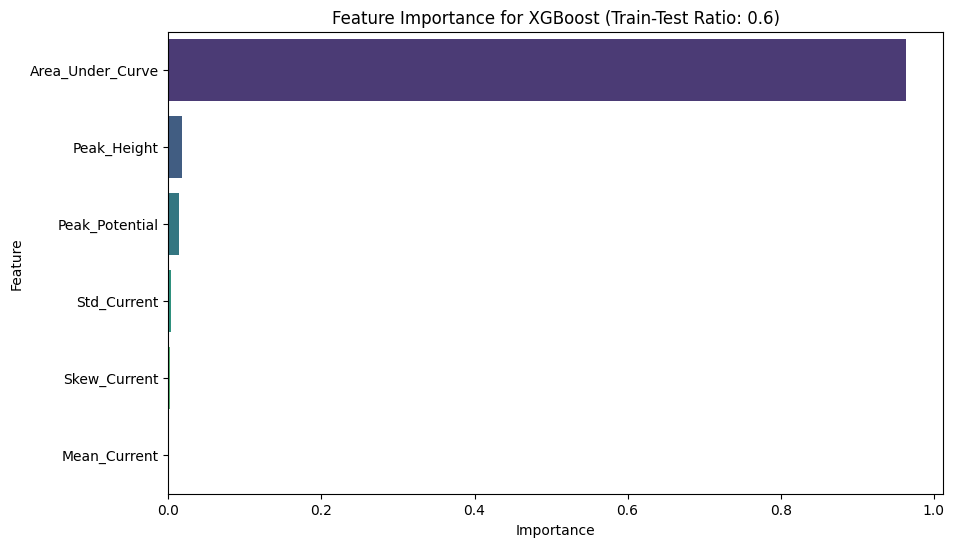

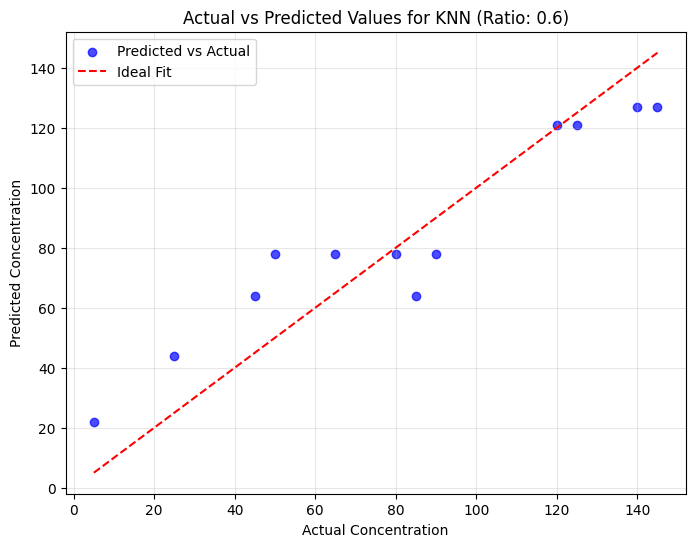

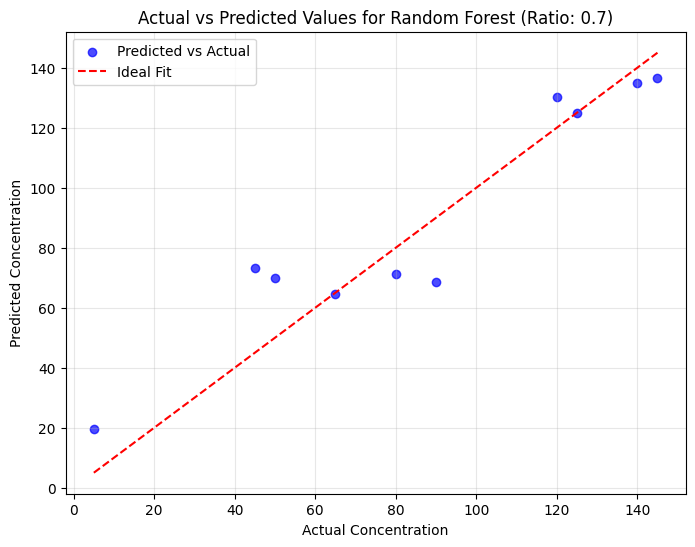

<ipython-input-13-3803bdc8a174>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=feature_names, palette="viridis")


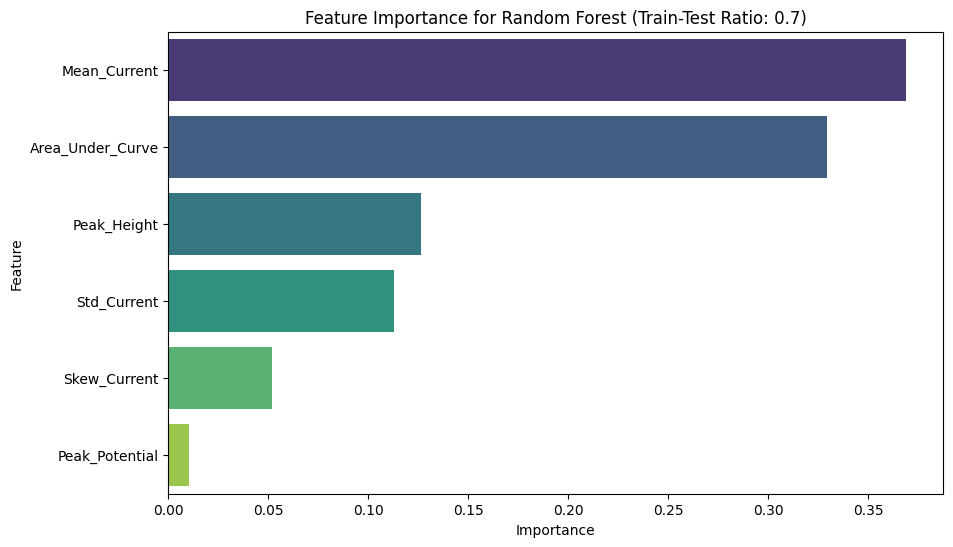

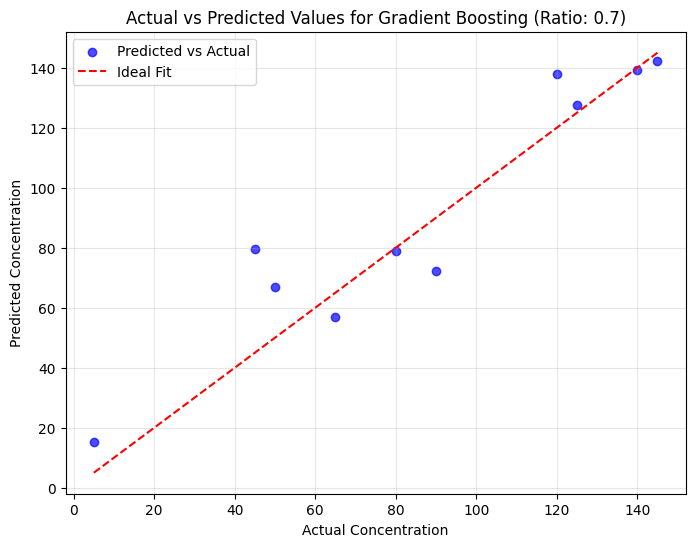

<ipython-input-13-3803bdc8a174>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=feature_names, palette="viridis")


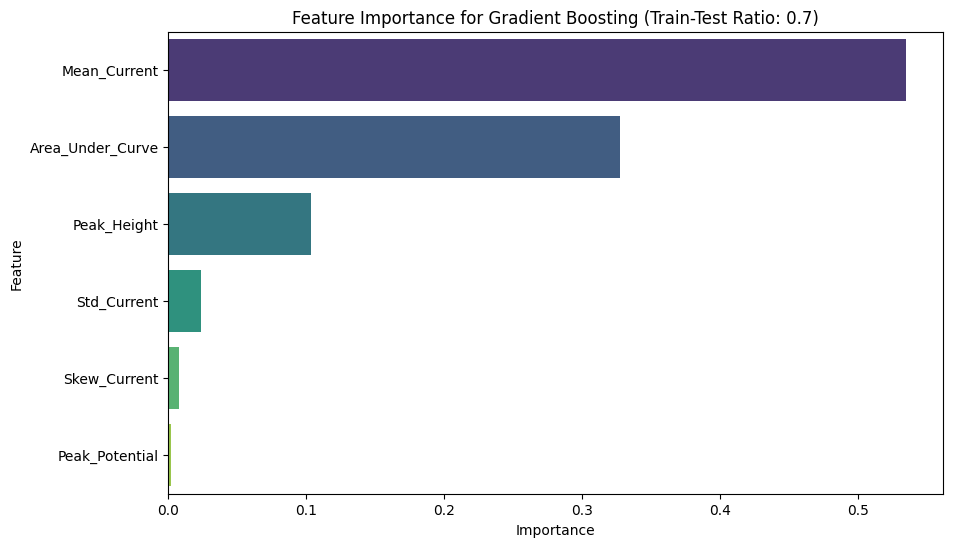

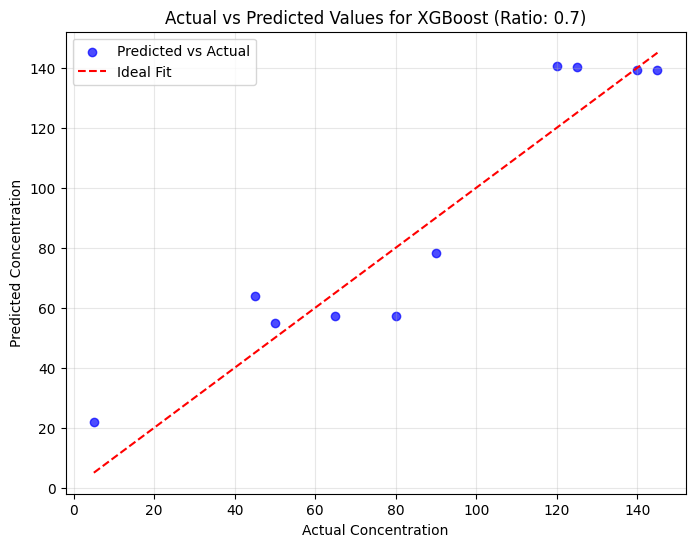

<ipython-input-13-3803bdc8a174>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=feature_names, palette="viridis")


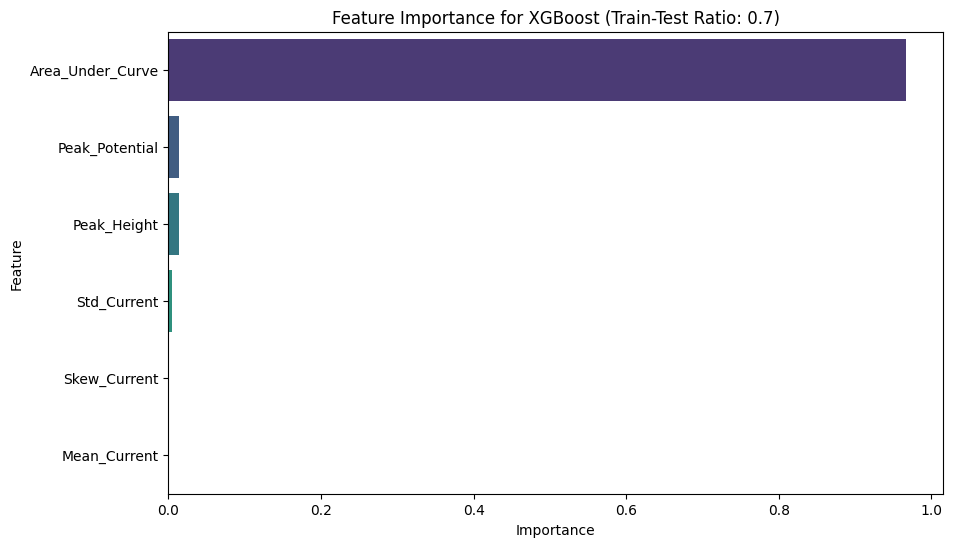

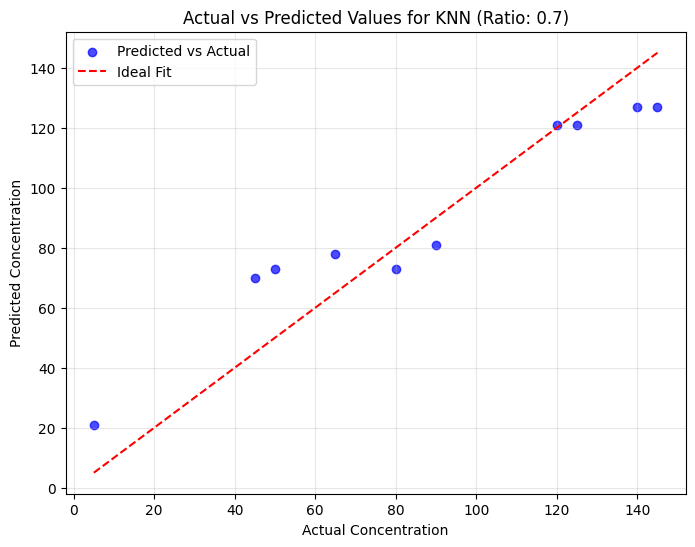

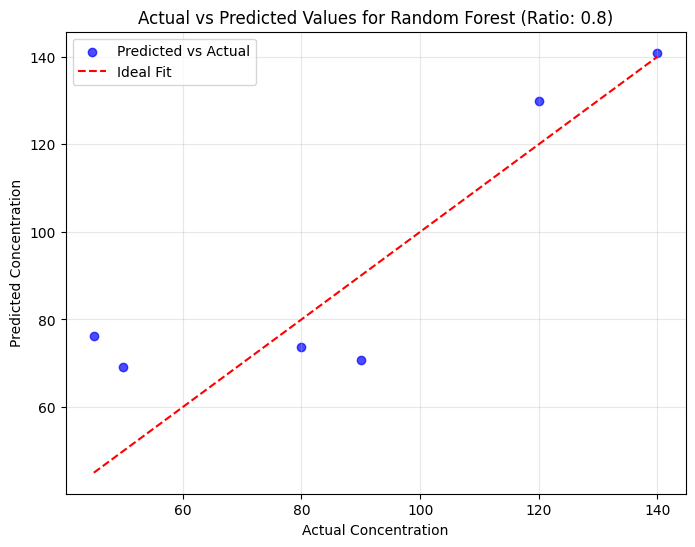

<ipython-input-13-3803bdc8a174>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=feature_names, palette="viridis")


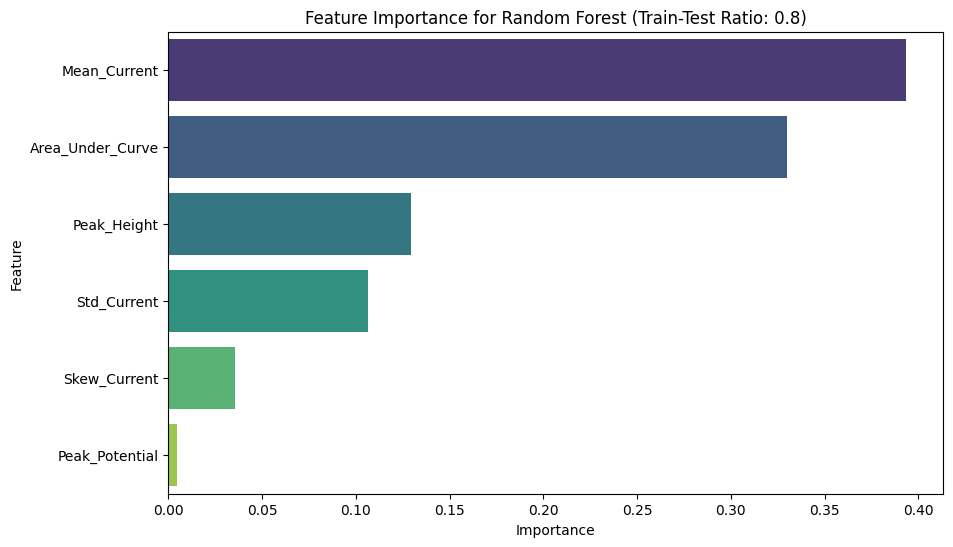

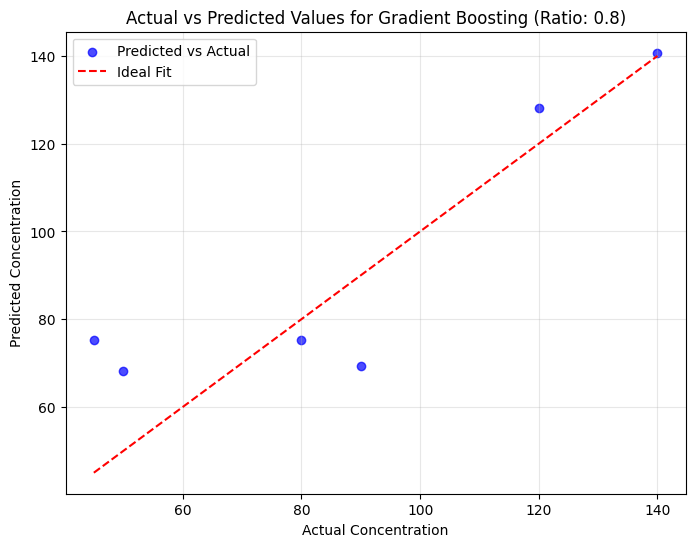

<ipython-input-13-3803bdc8a174>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=feature_names, palette="viridis")


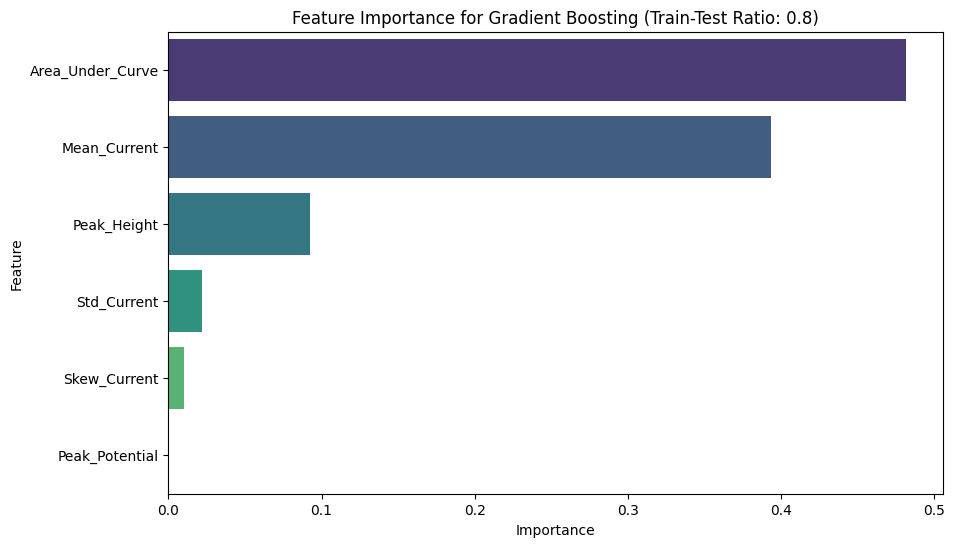

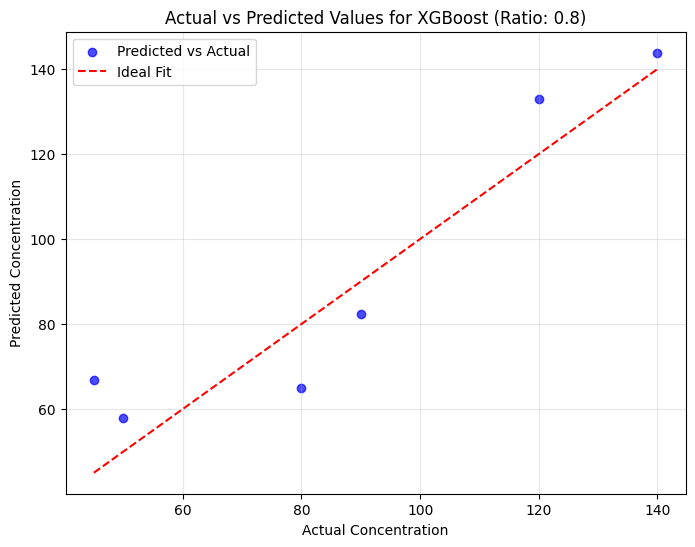

<ipython-input-13-3803bdc8a174>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=feature_names, palette="viridis")


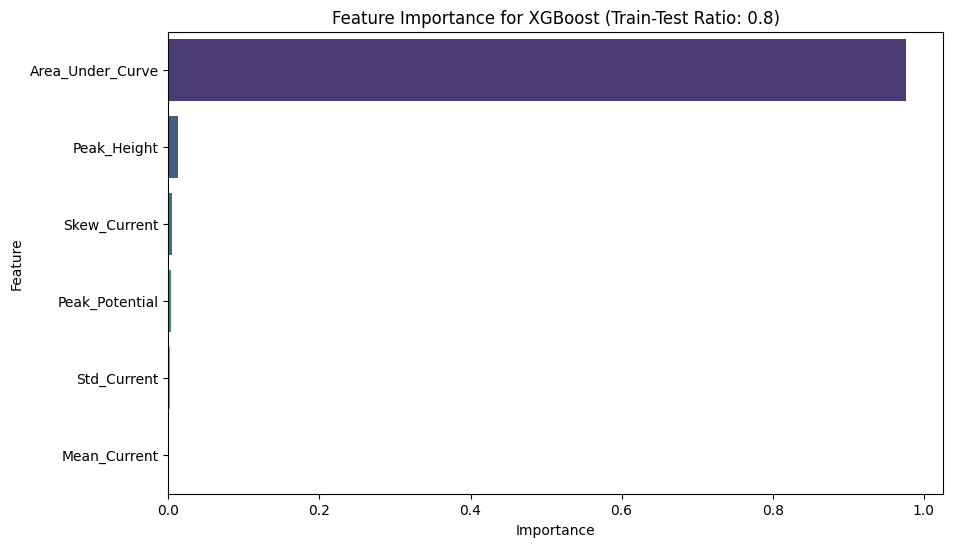

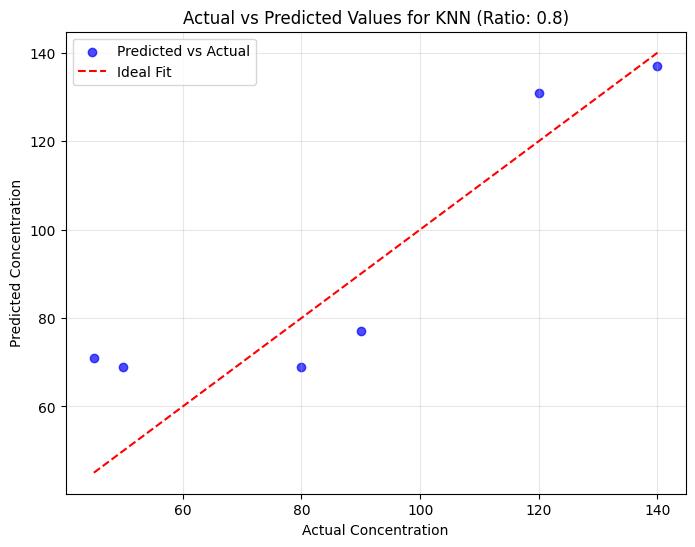

                Model  Train-Test Ratio       MSE      R²
0       Random Forest               0.5  175.1047  0.8962
1   Gradient Boosting               0.5  161.2036  0.9044
2             XGBoost               0.5  216.0746  0.8719
3                 KNN               0.5  504.8000  0.7006
4       Random Forest               0.6  155.0054  0.9175
5   Gradient Boosting               0.6  129.0505  0.9313
6             XGBoost               0.6  221.0491  0.8824
7                 KNN               0.6  255.2500  0.8642
8       Random Forest               0.7  214.8292  0.8875
9   Gradient Boosting               0.7  229.7347  0.8797
10            XGBoost               0.7  208.0102  0.8911
11                KNN               0.7  221.9000  0.8838
12      Random Forest               0.8  309.7867  0.7377
13  Gradient Boosting               0.8  295.2518  0.7501
14            XGBoost               0.8  166.2832  0.8592
15                KNN               0.8  242.8333  0.7944


<ipython-input-13-3803bdc8a174>:92: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=metrics_df, x="Model", y="R²", hue="Train-Test Ratio", ci=None)


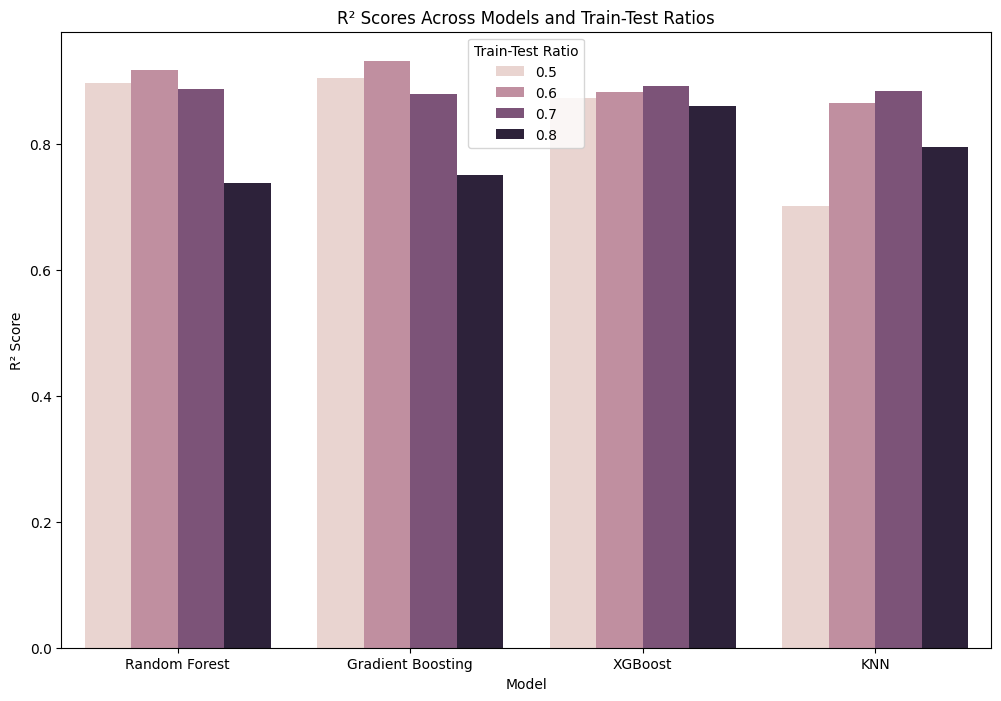

In [13]:
#Importing the  Required Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor  # Correctly import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

#Upload processed_data.csv here
uploaded = files.upload()


for filename in uploaded.keys():
    data = pd.read_csv(filename)
    print(f"Loaded file: {filename}")


    features = ['Peak_Height', 'Peak_Potential', 'Area_Under_Curve',
                'Mean_Current', 'Std_Current', 'Skew_Current']
    X = data[features]
    y = data["Concentration"]  # Label

    # The 4 Models to evaluate
    models = {
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
        "KNN": KNeighborsRegressor(n_neighbors=5)
    }

    # Four different Train-Test Ratios
    ratios = [0.5, 0.6, 0.7, 0.8]
    metrics_df = pd.DataFrame()

    for ratio in ratios:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - ratio, random_state=42)

        for name, model in models.items():

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Computation of  the  regression metrics
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)


            new_row = pd.DataFrame([{
                "Model": name,
                "Train-Test Ratio": ratio,
                "MSE": mse,
                "R²": r2
            }])
            metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

            # Plots  of Actual vs Predicted Values for all test-train sets
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
            plt.title(f"Actual vs Predicted Values for {name} (Ratio: {ratio})")
            plt.xlabel("Actual Concentration")
            plt.ylabel("Predicted Concentration")
            plt.legend()
            plt.grid(alpha=0.3)
            plt.show()

            # To get the Feature Importance graphs
            if hasattr(model, 'feature_importances_'):
                importances = model.feature_importances_
                sorted_idx = np.argsort(importances)[::-1]
                feature_names = X.columns[sorted_idx]
                sorted_importances = importances[sorted_idx]

                plt.figure(figsize=(10, 6))
                sns.barplot(x=sorted_importances, y=feature_names, palette="viridis")
                plt.title(f"Feature Importance for {name} (Train-Test Ratio: {ratio})")
                plt.xlabel("Importance")
                plt.ylabel("Feature")
                plt.show()

    metrics_df = metrics_df.round(4)
    print(metrics_df)

    # To Show the Comparison  Table
    plt.figure(figsize=(12, 8))
    sns.barplot(data=metrics_df, x="Model", y="R²", hue="Train-Test Ratio", ci=None)
    plt.title("R² Scores Across Models and Train-Test Ratios")
    plt.ylabel("R² Score")
    plt.xlabel("Model")
    plt.legend(title="Train-Test Ratio")
    plt.show()
